<a href="https://colab.research.google.com/github/deepanshuMeteor/QA-Big-Data-Fundamentals/blob/main/34_Py4Sci_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Libraries in Python

## What is a library?

Below we open and display the "prg.py" file... 

(NB. the only reason to do this is to include the file contents here, so we can see it!).

In [1]:
print(open("prg.py").read())

name = "Michael"

2 ** 3

print(2 ** 3)


If you say `import filename` (without `.py`), python will run the file:

In [2]:
import prg

8


Anything defined inside the file is available as `prg.`. 

In [3]:
prg.name

'Michael'

## What's the workflow for working with python modules and notebooks?

A `.py` file is called a *module* and may only contain python code.

You can `import` modules. 

As a data analyst (, scientist, etc.) you will often first prototype (write) a solution in a notebook, and then transfer the key repeated, **shareable** elements to a module. 

In [ ]:
a, b, x = 1, 2, 3

result = a * x + b

In [ ]:
import shared

shared.result

5

## How do you define reusable functions?

The `def` keyword defines a term `f` below, which is a function of one argument `x`. 

The function, when executed using `f()`, executes the block of indented code line-by-line. 

The line marked `return` is the value produced when the function is executed; ie., it is the *value* of that function. 

In [ ]:
def f(x):
    a, b = 1, 2
    
    return a * x + b

f(3)

5

In [ ]:
f(7)

9

For any purely mathematical function, there will only be one-line, `return ...`.

$g(x)      =      x^2$

`def g(x) return x ** 2`

In [ ]:
def g(x):
    return x ** 2

g(10)

100

In [ ]:
def g(x):
    print(x)      # <- sending x to the screen  (THIS ISNT SAVED!)
    
    return x ** 2 # <- the result               (save to memory)

result = g(10) # the return value is saved into the "result" variable

10


In [ ]:
print(result) 

100


## How do I share  a function?

* define the function
* put it in a `.py` file
* `import` the file in the notebooks you need

In [ ]:
def classify_voter(x_age_yr, x_education_yr):
    if x_age_yr >= 45:
        return "C"
    elif x_education_yr <= 1:
        return "C"
    else:
        return "L"
    
classify_voter(44, 0)

'C'

Import (ie., run) the `shared.py` and use `s` as the prefix to refer to all of its names (ie., functions, variables, etc.).

In [ ]:
import shared as s

In [ ]:
s.classify_voter(44, 0)

'C'

In [ ]:
s.result

5

## What are the key data science libaries?

Anaconda includes `python` and all of the following libraries. 

NumPy, Numerical Python: provides fast numerical arrays. 

In [ ]:
import numpy as np

Pandas: fast tables, based on numpy.

In [ ]:
import pandas as pd

Seaborn: Simple visualization library.

In [ ]:
import seaborn as sns

Matplotlib: more customizable visulization library (seaborn uses this). 

In [ ]:
import matplotlib.pyplot as plt

Sci-Kit Learn: simple machine learning library. 

In [ ]:
import sklearn as sk

Tensorflow: a library for running mathematical functions and tracking a gradient as you do so. This is mostly used for neural networks. 

(Aside: ie., it keeps track of how the loss changes, for almost any (complex) mathematical function). 

In [ ]:
import tensorflow as tf

NetworkX: (Social) Network Analysis

In [ ]:
import networkx as nx

## How do I install a python package? 

* package = unified libraries

In [ ]:
!pip install networkx

## Why do you need to use libraries?

eg., NumPy provies "fast arrays"... why not just use lists?

Python is **very** slow. So any syntax (keywords, data structures, etc.) are **slow**. 

How can NumPy be faster? Isn't numpy written in python? **NO!!**

Almost all the code data scientists (, analysts) are using is not written in python. 

In [ ]:
np.random.normal(0, 5, 10)

array([-6.70818376,  0.1262422 , -1.45490117,  3.32989769, 12.57914692,
        2.23088554, -0.47424464,  1.33968125,  0.21156761,  3.46445087])

In [ ]:
x = np.random.normal(0, 5, 10)
x.mean()

-0.7182280008652338

The `normal` function, and the `mean` function are written in either `FORTRAN` or `C` -- different languages which are much (, much) faster. 

You use a python name, eg., `x.mean`, but actually (compiled) `FORTRAN` code is being run. 

In [ ]:
%%timeit

x = np.random.normal(0, 5, 10_000) # <- happening elsewhere
x.mean()# not python! 

242 µs ± 2.42 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit 

import random # written in python
import statistics # written in python

# list <- python data structure
x = []

# for keyword <- python loop
for i in range(10_000):
    # .append
    x.append( 5*random.random() ) # using python code
    
statistics.mean(x) # using python code

7.64 ms ± 62.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Python is >30x slower

In [ ]:
7.64 / 0.242

31.570247933884296

However, note that the numpy code is liekly to be the fastest you can possibly write (ie., its unlikely you will write faster in any other language). 

## How do the libraries work together?

* NumPy 
    * arrays
* Pandas
    * tables (, data files, ...)
* Seaborn
    * visualization
* Sklearn
    * machine learning

### 1. We use Pandas to Load a Dataset into a Table

`read_csv` loads a csv file into a *DataFrame* (aka. a table). 

In [ ]:
loan = pd.read_csv('datasets/loan_train.csv')

len(loan)

7500

### 2. Use Pandas to Explore & Prepare Data

* Look at samples
* Removing missing data

In [ ]:
loan = loan.dropna()
loan.sample(2)

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
6812,6812,Rent,601312.0,2 years,0.0,10.0,11.4,202444.0,0.0,58.0,0.0,debt consolidation,Short Term,193644.0,139175.0,12277.0,738.0,1
480,480,Rent,1355745.0,2 years,0.0,9.0,19.8,322718.0,2.0,75.0,2.0,debt consolidation,Short Term,221100.0,226309.0,26211.0,743.0,0


### 3. Choose Learning Columns & Extract as Fast NumPy arrays from Table

In [ ]:
data = loan[['Current Credit Balance', 'Annual Income']].to_numpy()

x = data[:, 0:1]
y = data[:, 1]

In [ ]:
x

array([[ 51623.],
       [ 89015.],
       [201989.],
       ...,
       [108889.],
       [167428.],
       [456399.]])

### 4. Use Seaborn to Inspect

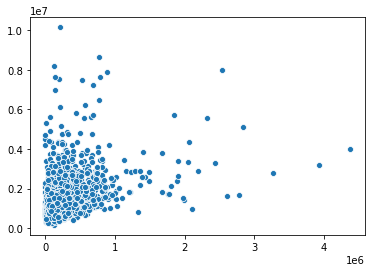

In [ ]:
sns.scatterplot(x[:, 0], y);

### 5. Use sklearn with NumPy arrays to learn (statistical) model

#### Choose model (eg., LinearRegression)

In [ ]:
from sklearn.linear_model import LinearRegression

#### Fit model on data (ie., "Learn")

In [ ]:
model = LinearRegression().fit(x, y)

#### Logical Inspection of Model

The parameters of the model are, for linear regression, given in `coef_` and `intercept_`...

In [ ]:
model.coef_

array([1.05873795])

In [ ]:
model.intercept_

1181967.9283122767

$f(x) = 1.06x + 1181968 = ax + b$

#### Visual Inspection of Model

In [ ]:
yhat = model.predict(x)

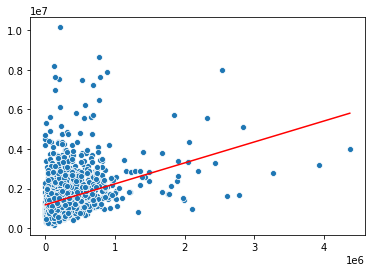

In [ ]:
sns.scatterplot(x[:, 0], y)
sns.lineplot(x[:, 0], yhat, color="red")

#### Evaluate Model

In [ ]:
model.score(x, y)

0.1215943777872095

## Exercise (25min)

You are hired by a cinema to make film recommendations to customers as they speak to your front desk staff.

Your staff may observe: their age, budget, like_action, like_comedy. 

Note, $x : (age, budget, action, comedy) = (18, 10, +1, -1)$

### Q1. Define a function

* You design a classification function which recommends either "Transformers" or "AnnieHall". 
    * The function should be called `recommend()`. 
    * HINT: it will have four arguments (`age, budget...`). 

You use the following rules:

* if the customer is a child, always recommend "Transfomers"
    * ```
        if age < 18: 
            return "Transfomers"
    ```
* if the budget is under 10, always recommend "AnnieHall"
* otherwise if they like action recommend "Transformers"
* otherwise recommend "AnnieHall"

* Run your function to show that it works

In [ ]:
def recommend(age, budget, action, comedy):
    if (age < 18) or (budget < 10):
        return "T"
    elif action == +1:
        return "T"
    else:
        return "AH"
    
    
recommend(18, 12, -1, +1)

'AH'

### Q2. Define a module

* In the same directory as your present notebook, create `model.py`
    * NOTE: you cannot create empty files with **jupyter notebook**
    * (you may need to create this with a text editor...)
    * cut & paste your function into `model.py`
* Run `import model`
* Run `model.recommend(18, 10, +1, -1)`
    * report the film recommendation
    
* **NOTE** if you're having trouble with `import` (eg., if you need to import twice), you must `Kernal > Restart`

In [ ]:
import model

In [ ]:
model.recommend(18, 10, +1, -1)

'T'